In [3]:
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import DataReader

import pyflux as pf

from IPython.core.display import display

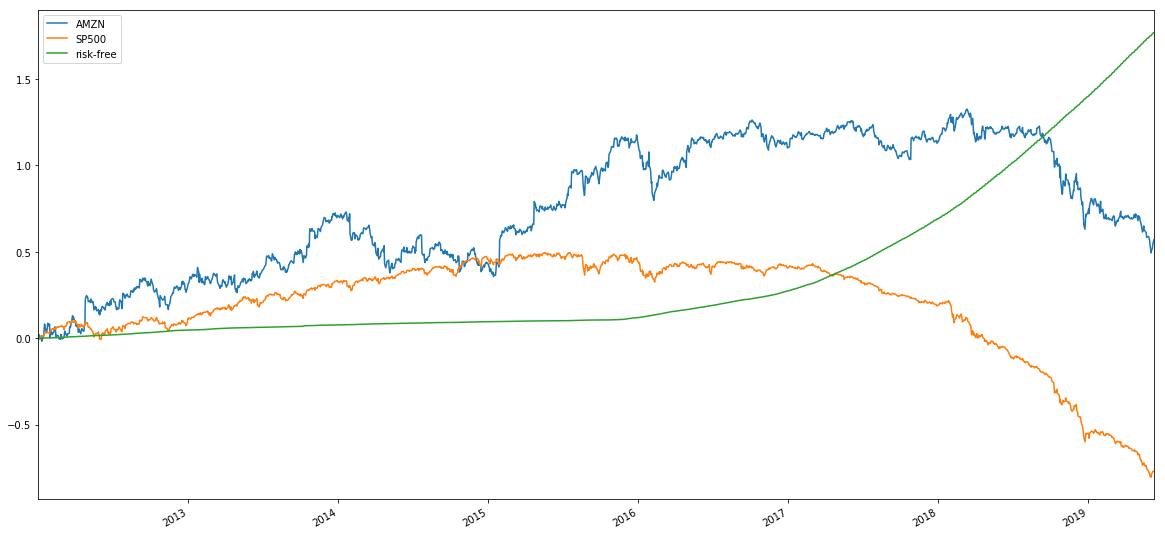

In [24]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2019, 6, 13)

amzn = DataReader('AMZN', 'yahoo', start, end)
amzn['log_returns'] = np.log(amzn['Adj Close']).diff(1).dropna()

sp500 = DataReader('SPY', 'yahoo', start, end)
sp500['log_returns'] = np.log(sp500['Adj Close']).diff(1).dropna()

dgs1mo = DataReader('DGS1MO', 'fred', start, end)
dgs1mo = np.log1p(dgs1mo) / 365

data = pd.concat([
    amzn['log_returns'] - dgs1mo['DGS1MO'],
    sp500['log_returns'] - dgs1mo['DGS1MO'],
    dgs1mo['DGS1MO']
], axis=1).dropna()

data.columns = ['AMZN', 'SP500', 'risk-free']

data.cumsum().plot(figsize=(20, 10))

In [27]:
model = pf.DynReg('AMZN ~ SP500', data=data)
fit = model.fit()
fit.summary()

Dynamic Linear Regression                                                                                 
======================================================= ==================================================
Dependent Variable: AMZN                                Method: MLE                                       
Start Date: 2012-01-04 00:00:00                         Log Likelihood: 5066.8343                         
End Date: 2019-06-11 00:00:00                           AIC: -10127.6686                                  
Number of observations: 1857                            BIC: -10111.0885                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        0.0002                                                           
Sigma^2 1                            

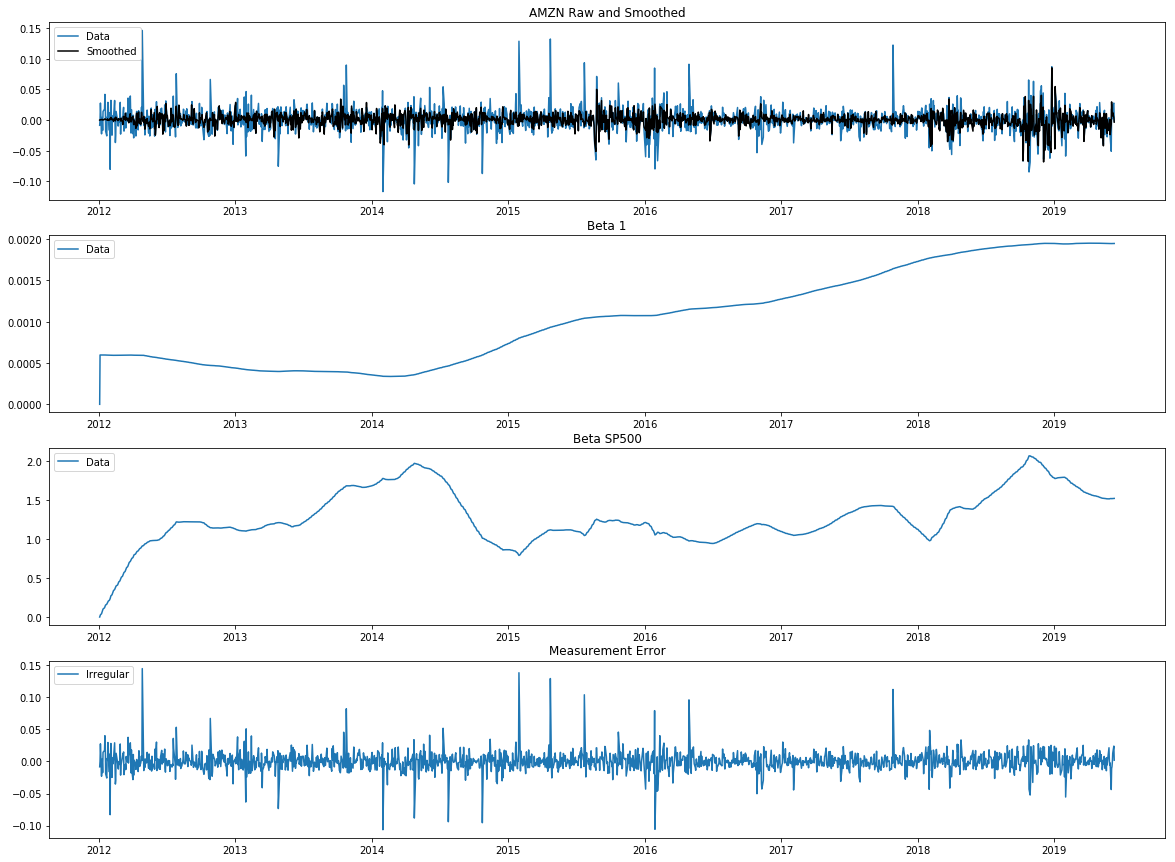

<Figure size 432x288 with 0 Axes>

In [30]:
model.plot_fit(figsize=(20, 15))
plt.tight_layout()